In [1]:
# kernel = Tensorflow-2.14

In [1]:
import keras
from tensorflow.keras.models import Sequential
# from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

2025-01-02 21:33:02.553777: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-02 21:33:02.553827: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-02 21:33:02.553833: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-02 21:33:02.607783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# from keras import backend as K

# K.tensorflow_backend._get_available_gpus()

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
TRAINING_FILE = "image_tagging/train.csv"
TRAINING_IMAGES = "/blue/rcstudents/smaley/pokegan/customsprites/blk_bg/input"
IMAGE_SIZE = (64,64,3)

In [4]:
# train = pd.read_csv(TRAINING_FILE, nrows=40000) # set limit, delete "nrows" to undo
train = pd.read_csv(TRAINING_FILE)
train.drop(['Name'],axis=1,inplace=True)
train.head()

,Key,Type,normal,fire,water,grass,electric,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,291.151,"steel, psychic",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,47.19a,"bug, normal",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,335.394,water,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,39.209b,"normal, fairy",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,460.50a,ground,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [5]:
train.columns

Index(['Key', 'Type', 'normal', 'fire', 'water', 'grass', 'electric', 'ice',
       'fighting', 'poison', 'ground', 'flying', 'psychic', 'bug', 'rock',
       'ghost', 'dragon', 'dark', 'steel', 'fairy'],
      dtype='object')

In [6]:
train_images = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(f"{TRAINING_IMAGES}/{train.at[i, 'Key']}.png",target_size=IMAGE_SIZE)
    img = image.img_to_array(img)
    img = img / 255.0
    train_images.append(img)
X = np.array(train_images)

100%|██████████| 81650/81650 [02:31<00:00, 540.53it/s]


In [7]:
X.shape

(81650, 64, 64, 3)

In [8]:
y = np.array(train.drop(['Key', 'Type'],axis=1))
y.shape

(81650, 18)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten, GlobalAveragePooling2D, Activation, Add

# Define the model
model = Sequential()

# Block 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation=None, input_shape=IMAGE_SIZE))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation=None))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation=None))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation=None))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation=None))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation=None))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Block 4
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation=None))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation=None))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Global Average Pooling + Fully Connected Layers
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(18, activation="sigmoid"))

2025-01-02 21:35:41.756185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79078 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        0

In [12]:
# # Recompile with a lower learning rate
# model.compile(optimizer=Adam(learning_rate=1e-5), 
#               loss='binary_crossentropy', 
#               metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=2)])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2)])

In [15]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/150
1149/1149 [==============================] - 13s 11ms/step - loss: 0.3149 - accuracy: 0.3039 - top_k_categorical_accuracy: 0.4045 - val_loss: 0.3145 - val_accuracy: 0.2752 - val_top_k_categorical_accuracy: 0.3590
Epoch 2/150
1149/1149 [==============================] - 13s 11ms/step - loss: 0.3104 - accuracy: 0.3069 - top_k_categorical_accuracy: 0.4121 - val_loss: 0.3021 - val_accuracy: 0.3062 - val_top_k_categorical_accuracy: 0.4109
Epoch 3/150
1149/1149 [==============================] - 13s 11ms/step - loss: 0.3059 - accuracy: 0.3140 - top_k_categorical_accuracy: 0.4265 - val_loss: 0.2984 - val_accuracy: 0.3123 - val_top_k_categorical_accuracy: 0.4372
Epoch 4/150
1149/1149 [==============================] - 13s 11ms/step - loss: 0.3010 - accuracy: 0.3250 - top_k_categorical_accuracy: 0.4381 - val_loss: 0.2937 - val_accuracy: 0.3440 - val_top_k_categorical_accuracy: 0.4634
Epoch 5/150
1149/1149 [==============================] - 13s 11ms/step - loss: 0.2965 - accuracy: 0.

In [16]:
model.save('tf_64x64_150_epoch.keras')
np.save('64x64_150_history.npy',history.history)
# history=np.load('my_history.npy',allow_pickle='TRUE').item()

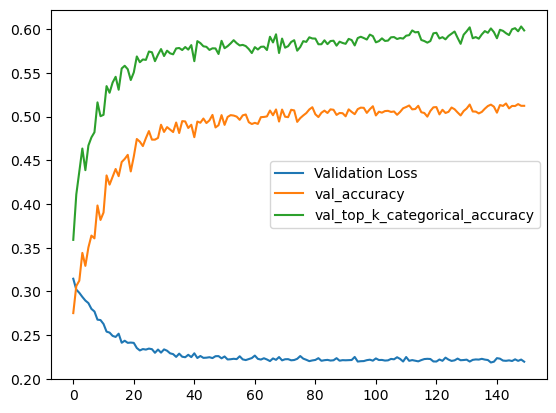

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top_k_categorical_accuracy')
plt.legend()
plt.show()

In [18]:
import csv

file_path = "image_tagging/all_pokemon_to_type.csv"
pokedex = {}

with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        key = row['Key']
        value = {col: row[col] for col in row if col != 'Key'}
        pokedex[key] = value

1/1 [==============================] - 0s 26ms/step


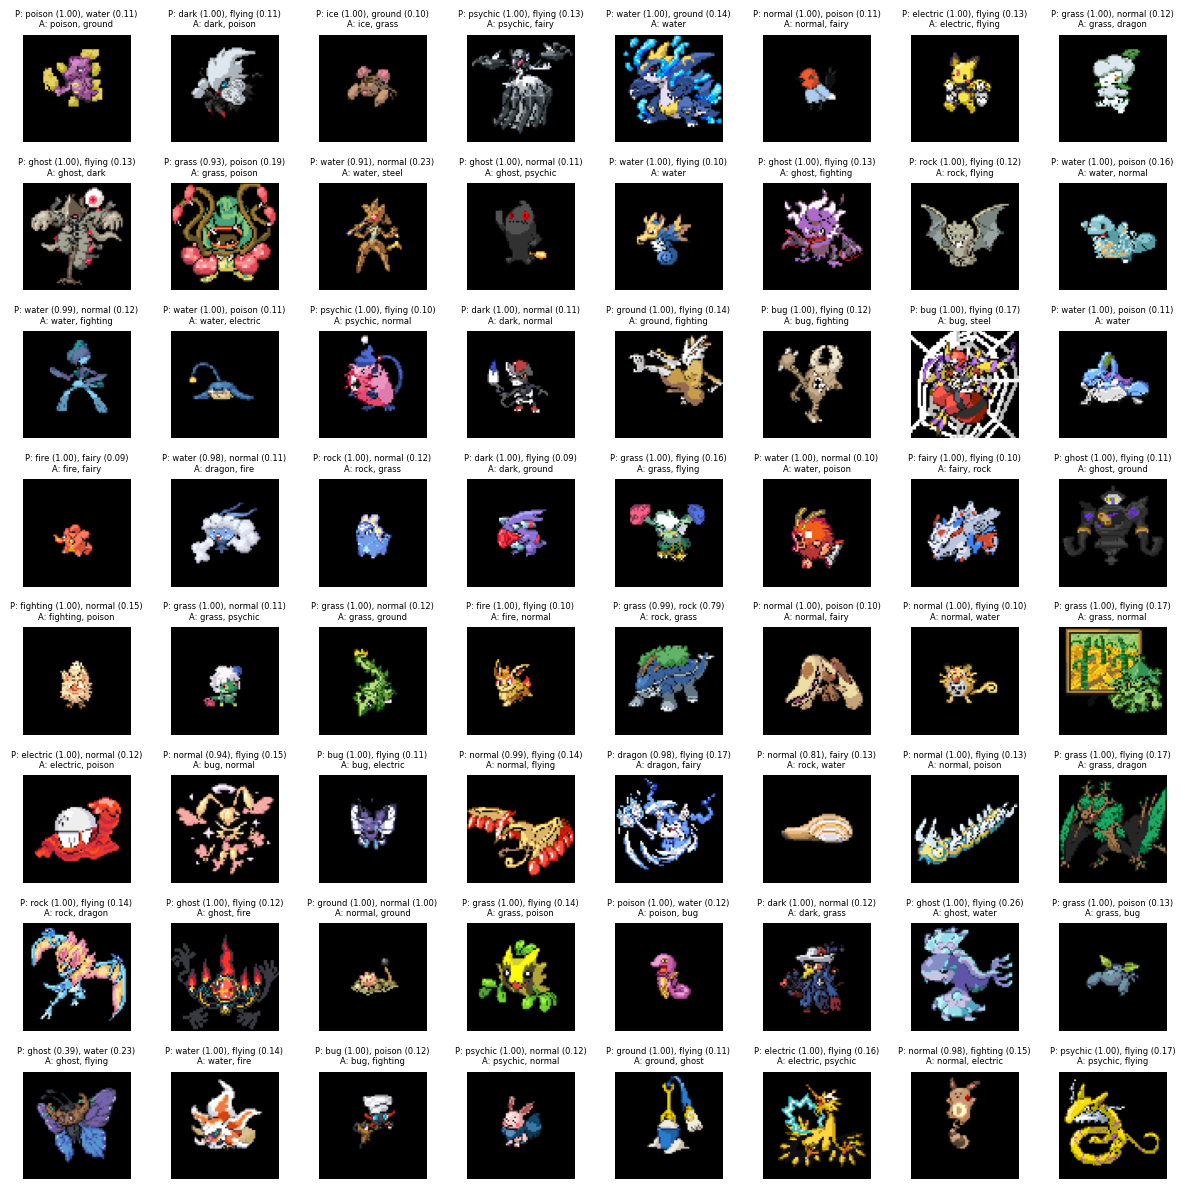

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Constants
GRID_SIZE = 8  # 8x8 grid
OUTPUT_FILE = "predictions_grid.png"  # Output file name

# Variables
count = 0
fig, axes = plt.subplots(GRID_SIZE, GRID_SIZE, figsize=(12, 12))
axes = axes.flatten()

# Iterate through the dataset
for idx, file_name in enumerate(os.listdir(TRAINING_IMAGES)):
    if count >= GRID_SIZE * GRID_SIZE:  # Limit to 64 images
        break
    
    # Load and preprocess the image
    img_path = os.path.join(TRAINING_IMAGES, file_name)
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    classes = np.array(train.columns[2:])
    
    # Make predictions
    proba = model.predict(img_array.reshape((1,) + IMAGE_SIZE))
    # print(proba)
    top_2 = np.argsort(proba[0])[:-3:-1]  # Get top 2 predictions
    top_2_predictions = [f"{classes[i]} ({proba[0][i]:.2f})" for i in top_2]
    
    # Get ground truth
    ground_truth = pokedex[file_name[:-4]]["Type"]
    
    # Plot image in grid
    axes[idx].imshow(img)
    axes[idx].axis('off')  # Turn off axis
    axes[idx].set_title(f"P: {', '.join(top_2_predictions)}\nA: {ground_truth}", fontsize=6)
    
    count += 1

# Adjust layout and save the grid
plt.tight_layout()
# plt.savefig(OUTPUT_FILE, dpi=300)
plt.show()